In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 1) **Revisar**

La imagen binaria dada por Matlab es más confiable que la que se obtiene por medio de Python. Revisar y comparar los resultados de cada código para mejorar los resultados de Python

In [ ]:
# # Cargar la imagen del mapa de calor del partido de fútbol
# imagen_original = cv2.imread('descarga (2).png')

# # Convertir a escala de grises si es necesario
# imagen_gris = cv2.cvtColor(imagen_original, cv2.COLOR_BGR2GRAY)

# # Definir parámetros
# sigma = 60  # Ajustar el valor de sigma según sea necesario
# filas, columnas = imagen_gris.shape
# centro_filas = filas // 2
# centro_columnas = columnas // 2

# # Aplicar la Transformada Rápida de Fourier (FFT)
# fft_imagen = np.fft.fft2(imagen_gris)

# # Crear un filtro gaussiano en el dominio de la frecuencia
# [X, Y] = np.meshgrid(np.arange(1, columnas + 1), np.arange(1, filas + 1))
# filtro_gaussiano = np.exp(-((X - centro_columnas)**2 + (Y - centro_filas)**2) / (2 * sigma**2))

# # Normalizar el filtro gaussiano
# filtro_gaussiano = filtro_gaussiano / np.sum(filtro_gaussiano)

# # Aplicar el filtro gaussiano a la FFT de la imagen
# fft_filtrada = fft_imagen * filtro_gaussiano

# # Transformada inversa de Fourier (IFT) para obtener la imagen filtrada
# imagen_filtrada = np.fft.ifft2(fft_filtrada)

# # Normalizar los valores de la imagen al rango [0, 1]
# imagen_normalizada = (np.abs(imagen_filtrada) - np.min(np.abs(imagen_filtrada))) / (np.max(np.abs(imagen_filtrada)) - np.min(np.abs(imagen_filtrada)))

# # Visualizar los resultados
# plt.figure(figsize=(12, 6))

# plt.suptitle(f'Sigma: {sigma}')

# plt.subplot(2, 2, 1)
# plt.imshow(imagen_original)
# plt.title('Imagen original (B/W)')

# plt.subplot(2, 2, 2)
# plt.imshow(np.log(np.abs(np.fft.fftshift(fft_imagen))), cmap='gray')
# plt.title('FFT de la imagen')

# plt.subplot(2, 2, 3)
# plt.imshow(filtro_gaussiano, cmap='gray')
# plt.title('Filtro gaussiano')

# plt.subplot(2, 2, 4)
# plt.imshow(imagen_normalizada, cmap='gray')
# plt.title('Transformada Inversa')

# plt.tight_layout()
# plt.show()

In [ ]:
# # Umbral para distinguir blanco y negro
# umbral = 0.5

# # Convertir los valores de la imagen filtrada a blanco o negro según el umbral
# imagen_binaria = imagen_normalizada > umbral

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt

# df = pd.DataFrame(imagen_binaria)
# df

In [ ]:
# # Grafica los valores del DataFrame
# plt.imshow(df, cmap='binary', aspect='auto')
# plt.colorbar()  # Agrega una barra de color para indicar los valores
# plt.title('Valores de la imagen binaria')
# plt.xlabel('Columnas')
# plt.ylabel('Filas')
# plt.show()


In [ ]:
# num_div = 1
# list_sum = []

# for i, j in zip(list(range(0, columnas, num_div)), list(range(num_div, columnas+1, num_div))):
#   list_sum.append(df[[i_col for i_col in df.columns[i:j]]].sum().sum())

# len(list_sum), min(list_sum), max(list_sum)

In [ ]:
# sns.lineplot(list_sum)
# plt.xlabel('Value')
# plt.ylabel('Sum')
# plt.grid()
# plt.show()

# 2) **Gráfica discretizada del mapa de calor**

In [ ]:
num_px_col = 800

def graph_img_bin(img, num_div):
  df_2 = pd.read_csv(img, header=None)

  num_div = num_div
  list_sum_2 = []

  for i, j in zip(list(range(0, num_px_col, num_div)), list(range(num_div, num_px_col, num_div))):
    list_sum_2.append(df_2[[i_col for i_col in df_2.columns[i:j]]].sum().sum())


  plt.figure(figsize=(12, 6))
  sns.lineplot(list_sum_2, color='orange')
  plt.gca().set_facecolor('g')
  plt.title('Intensidad de juego Vs Posición en la Cancha')
  plt.xlabel('Cancha')
  plt.ylabel('Intensidad de juego')

  # Agregar asintotas vertical
  plt.axvline(x=400/num_div, color='red', linestyle='--')
  plt.axvline(x=100/num_div, color='blue', linestyle='solid', alpha=0.5)
  plt.axvline(x=700/num_div, color='blue', linestyle='solid', alpha=0.5)

  plt.grid()
  plt.show()

  return df_2

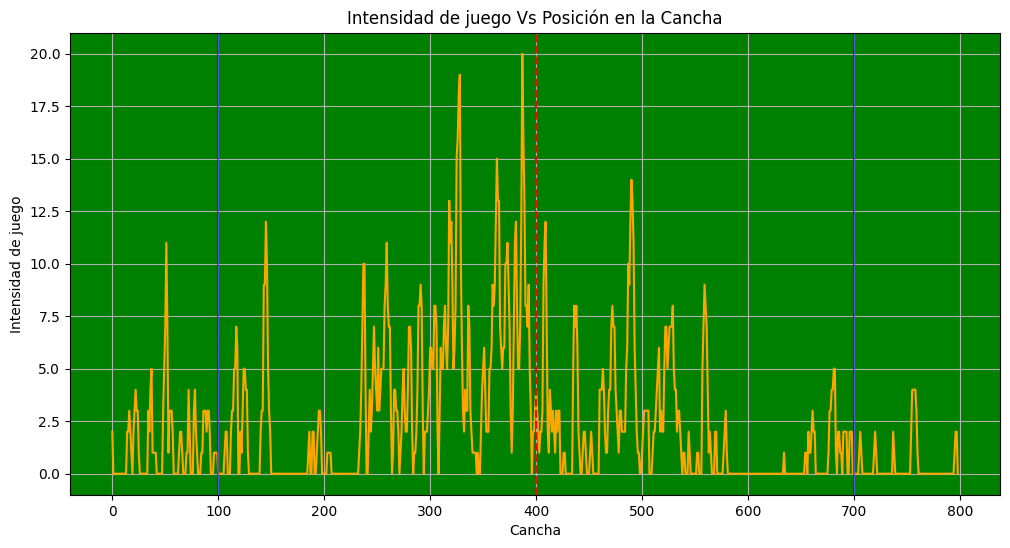

In [ ]:
df_2 = graph_img_bin('imagen_binaria (3).csv', 1)

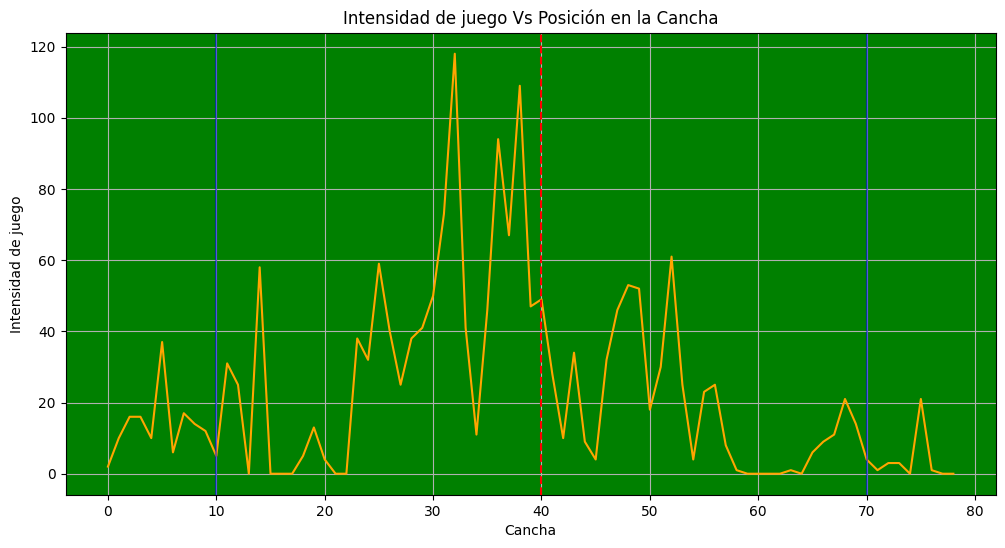

In [ ]:
df_2 = graph_img_bin('imagen_binaria (3).csv', 10)